In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
from scipy import stats

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 유니코드 깨짐현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
matplotlib.rcParams['font.family'] = 'NanumGothic'

In [3]:
# RMSE : root mean squared error 함수
def root_mean_squared_error(y_true, y_pred) :
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE : mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred) :
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

# 데이터 처리

In [4]:
df_raw=pd.read_csv("C:/python/2. Big Data 분석/AIR_POLLUTION.csv")
df_raw.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92


**변수 설명**
* MeasDate : 측정일자
* **PM10** : 미세먼지10㎍/㎥ 농도 (**목표변수**)
* O3 : 오존 농도
* NO2 : 이산화질소 농도
* CO : 일산화탄소 농도
* SO2 : 아황산가스 농도
* TEMP : 기온(ºC)
* RAIN : 강수량(mm)
* WIND : 풍속(m/s)
* WIND_DIR : 풍향(16방위)
* HUMIDITY : 습도(%)
* ATM_PRESS : 현지기압(hPa)
* SNOW : 적설(cm)
* CLOUD : 전운량(10분위)

In [5]:
df_raw.shape

(366, 14)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   366 non-null    object 
 1   PM10       365 non-null    float64
 2   O3         365 non-null    float64
 3   NO2        365 non-null    float64
 4   CO         311 non-null    float64
 5   SO2        365 non-null    float64
 6   TEMP       366 non-null    float64
 7   RAIN       366 non-null    float64
 8   WIND       366 non-null    float64
 9   WIND_DIR   366 non-null    int64  
 10  HUMIDITY   366 non-null    float64
 11  ATM_PRESS  366 non-null    float64
 12  SNOW       366 non-null    float64
 13  CLOUD      366 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 40.2+ KB


MeasDate 날짜형 데이터이므로 데이터 타입 변경

In [7]:
df_raw['MeasDate']=pd.to_datetime(df_raw['MeasDate'])

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   366 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       366 non-null    float64       
 7   RAIN       366 non-null    float64       
 8   WIND       366 non-null    float64       
 9   WIND_DIR   366 non-null    int64         
 10  HUMIDITY   366 non-null    float64       
 11  ATM_PRESS  366 non-null    float64       
 12  SNOW       366 non-null    float64       
 13  CLOUD      366 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 40.2 KB


In [9]:
df_raw.describe()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000000,365.000000,365.000000,311.000000,365.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,33.421918,0.023600,0.026814,0.517042,0.003033,13.863798,0.381639,2.225301,209.450820,60.295082,1005.848907,0.022951,5.064016
std,15.937983,0.011896,0.010271,0.152820,0.000632,9.830280,1.122127,0.723171,70.735018,14.534983,8.126823,0.222361,2.986119
min,5.000000,0.002000,0.008000,0.300000,0.002000,-7.950000,0.000000,0.940000,50.000000,17.900000,983.800000,0.000000,0.000000
25%,22.000000,0.014000,0.019000,0.400000,0.003000,5.492500,0.000000,1.722500,160.250000,49.650000,999.400000,0.000000,2.510000
50%,31.000000,0.023000,0.025000,0.500000,0.003000,14.000000,0.000000,2.095000,221.000000,61.050000,1006.450000,0.000000,5.310000
75%,42.000000,0.032000,0.034000,0.600000,0.003000,23.070000,0.115000,2.620000,266.000000,69.950000,1011.575000,0.000000,7.570000
max,101.000000,0.062000,0.059000,1.000000,0.005000,31.720000,11.800000,5.880000,351.000000,95.000000,1025.500000,3.200000,10.000000


기술통계량 확인 결과 총 366개의 데이터에서 일부 변수 결측치 확인

## 결측치 처리

In [10]:
df_raw.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

목표변수 PM10이 결측치인 행은 제거해야 함

In [11]:
df_raw[df_raw['PM10'].isnull()]

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
328,2020-05-24,NaN,NaN,NaN,NaN,NaN,17.48,1.45,2.85,257,83.3,999.4,0.0,8.21


In [12]:
df = df_raw.drop(index=df_raw[df_raw['PM10'].isna()].index)
df.reset_index(drop=True, inplace=True)

In [13]:
df.isnull().sum()

MeasDate      0
PM10          0
O3            0
NO2           0
CO           54
SO2           0
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

PM10 결측치 제거 이후, 변수 'CO'에 대하여 결측치 54개 확인

In [14]:
df[df['CO'].isnull()]

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
25,2019-07-26,22.0,0.021,0.027,NaN,0.002,25.06,3.00,1.72,187,94.9,993.9,0.0,9.88
26,2019-07-27,20.0,0.028,0.025,NaN,0.003,28.10,0.10,1.15,151,78.6,995.6,0.0,8.21
27,2019-07-28,16.0,0.018,0.019,NaN,0.002,26.31,1.28,2.00,179,87.1,998.0,0.0,9.88
28,2019-07-29,16.0,0.007,0.017,NaN,0.002,27.42,0.17,2.66,197,75.0,999.3,0.0,8.13
29,2019-07-30,22.0,0.010,0.019,NaN,0.002,28.04,0.17,3.45,203,75.3,997.2,0.0,8.33
30,2019-07-31,20.0,0.016,0.025,NaN,0.002,25.87,3.11,2.30,195,91.3,998.9,0.0,9.58
31,2019-08-01,15.0,0.014,0.020,NaN,0.002,26.41,2.25,1.70,237,85.8,1001.8,0.0,7.42
32,2019-08-02,19.0,0.020,0.020,NaN,0.002,28.38,0.00,1.26,185,74.8,1001.9,0.0,4.04
33,2019-08-03,21.0,0.033,0.029,NaN,0.002,29.40,1.00,1.36,152,70.6,1001.1,0.0,4.29
34,2019-08-04,29.0,0.042,0.030,NaN,0.003,28.46,2.87,1.21,165,73.4,1001.0,0.0,5.50


(array([30., 90., 90.,  0., 43., 26.,  0., 22.,  8.,  2.]),
 array([0.3 , 0.37, 0.44, 0.51, 0.58, 0.65, 0.72, 0.79, 0.86, 0.93, 1.  ]),
 <BarContainer object of 10 artists>)

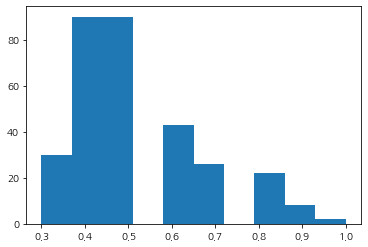

In [15]:
plt.hist(df['CO'])

CO 결측치가 발생한 곳은 2019년 7월부터 2019년 9월까지 데이터이며
CO 데이터 분포가 불균형적으로 나타난다.

일반적으로 여름철보다 겨울철 도시가스의 사용이 증가하며 도시가스의 주성분인 메탄가스의 사용량이 증가한다. 이 때 메탄가스가 연소되면서 CO가 발생하고 따라서 CO의 배출량은 다른 계절보다 겨울철에 증가하는 양상을 보인다.

CO 변화 양상을 확인하기 위하여 'MeasdDate'에서 월 데이터를 추출해 변수 'Month'생성

In [16]:
df['Month']=1
for i in range(0,len(df)) : 
    df['Month'][i]=df['MeasDate'][i].month

In [17]:
df.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,Month
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70,7
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83,7
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29,7
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54,7
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92,7


In [18]:
df.groupby(by=['Month'])['CO'].mean().round(3)

Month
1     0.655
2     0.576
3     0.487
4     0.413
5     0.440
6     0.443
7     0.424
8       NaN
9     0.446
10    0.471
11    0.617
12    0.655
Name: CO, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='CO'>

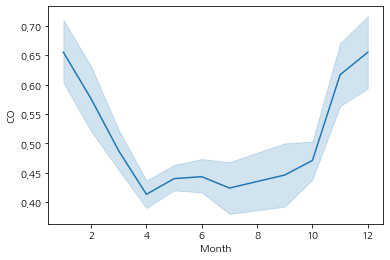

In [19]:
sns.lineplot(data=df, x='Month', y='CO')

확인 결과 11월부터 2월까지의 CO 배출량이 다른 월보다 대략 1.5배 증가한다.
따라서 7월부터 9월까지의 CO 결측치를 3월부터 10월까지 CO 배출량 평균으로 대체한다.

In [20]:
nan=df[(df['Month']>2) & (df['Month']<11)]['CO'].mean()
df['CO'].fillna(nan, inplace=True)

In [21]:
df.isnull().sum()

MeasDate     0
PM10         0
O3           0
NO2          0
CO           0
SO2          0
TEMP         0
RAIN         0
WIND         0
WIND_DIR     0
HUMIDITY     0
ATM_PRESS    0
SNOW         0
CLOUD        0
Month        0
dtype: int64

결측치 처리 완료.

In [22]:
# 결측치 처리 완료

## 이상치 처리

In [23]:
df.describe()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,Month
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,33.421918,0.023600,0.026814,0.506734,0.003033,13.853890,0.378712,2.223589,209.320548,60.232055,1005.866575,0.023014,5.055397,6.517808
std,15.937983,0.011896,0.010271,0.143188,0.000632,9.841944,1.122268,0.723421,70.788136,14.504766,8.130936,0.222663,2.985655,3.459790
min,5.000000,0.002000,0.008000,0.300000,0.002000,-7.950000,0.000000,0.940000,50.000000,17.900000,983.800000,0.000000,0.000000,1.000000
25%,22.000000,0.014000,0.019000,0.400000,0.003000,5.480000,0.000000,1.720000,160.000000,49.600000,999.400000,0.000000,2.500000,4.000000
50%,31.000000,0.023000,0.025000,0.500000,0.003000,13.870000,0.000000,2.090000,221.000000,61.000000,1006.500000,0.000000,5.290000,7.000000
75%,42.000000,0.032000,0.034000,0.600000,0.003000,23.100000,0.100000,2.620000,266.000000,69.800000,1011.600000,0.000000,7.540000,10.000000
max,101.000000,0.062000,0.059000,1.000000,0.005000,31.720000,11.800000,5.880000,351.000000,95.000000,1025.500000,3.200000,10.000000,12.000000


기술통계량 확인 결과 'SNOW'같은 일부 변수에서 이상치가 있을 수 있음을 확인

boxplot과 histogram을 그려 데이터 분포 확인 및 이상치 확인 진행

In [24]:
def outlier(data,var) :
    data[[var]].boxplot()
    data[[var]].hist()

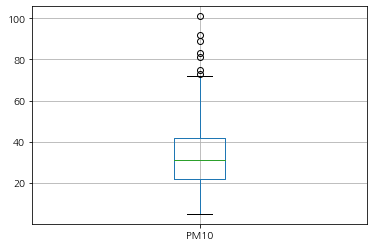

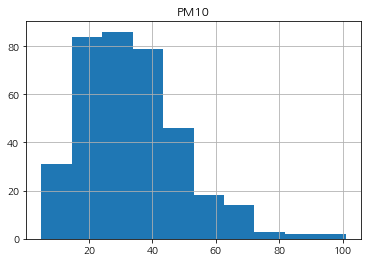

In [25]:
outlier(df, 'PM10')

**PM10**은 boxplot에서 일부 이상치 처럼 보이는 데이터가 있으나, 히스토그램에서 별도의 데이터 섬이 관찰되지 않았고 목표변수임을 고려하여 이상치를 제거하지 않았다. 또한 대략 30을 중심으로 몰려있는 분포 양상을 보인다.

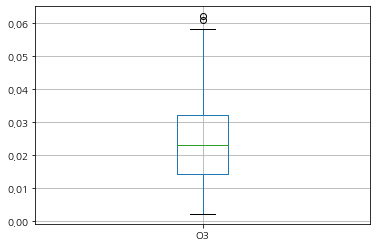

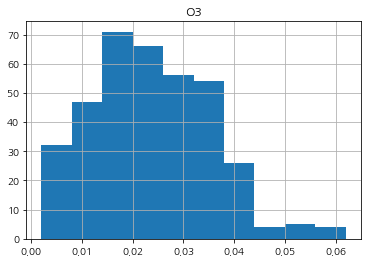

In [26]:
outlier(df, 'O3')

**O3**는 boxplot에서 이상치로 보이는 값은 있으나 미미하며, 데이터 섬이 나타나는 현상은 없기 때문에 이상치 제거하지 않고 진행. 대략 0.015에서 0.025를 중심으로 분포되어 있는 양상을 보인다.

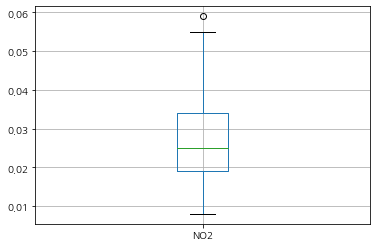

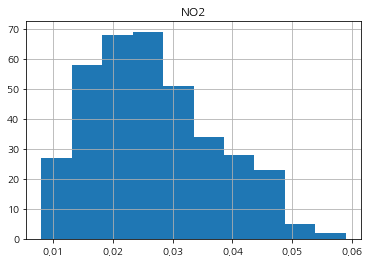

In [27]:
outlier(df, 'NO2')

**NO2**도 boxplot에서 이상치로 보이는 값은 있으나 미미하며, 데이터 섬이 나타나지 않았으므로 이상치 제거하지 않고 진행. O3와 마찬가지로 대략 0.015에서 0.025를 중심으로 분포되어 있는 양상을 보인다.

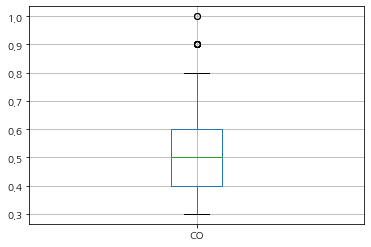

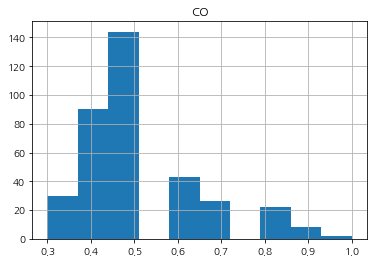

In [28]:
outlier(df, 'CO')

**CO**는 boxplot과 histogram에서 이상치로 보여지는 값들이 있으나 위 결측치 제거 당시 계절에 따라 CO 배출량에 큰 차이가 나타남을 고려하여 이상치가 아니라 판단하였다. 

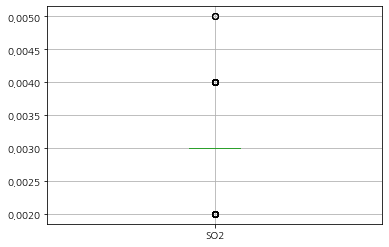

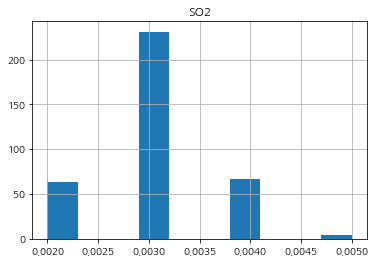

In [29]:
outlier(df, 'SO2')

**SO2**는 대표적인 대기오염물질로 지역마다 계절마다 발생량에 큰 차이를 보인다. 또한 그래프 상에서는 차이가 많은 것으로 나타나지만, x축과 y축 값의 범위가 0.0005 단위로 미미하여 이상치라고 판단하지 않고 진행하였다. 

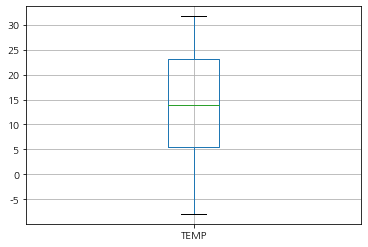

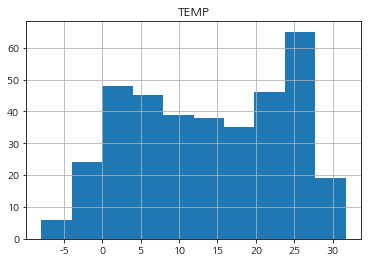

In [30]:
outlier(df, 'TEMP')

**TEMP**는 별도의 이상치를 발견할 수 없었으며, 우리나라의 사계절 특성상 0도부터 30도까지 골고루 분포하고 있음을 확인하였다.

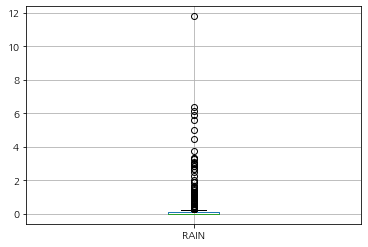

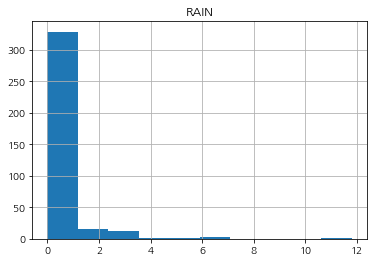

In [31]:
outlier(df, 'RAIN')

**RAIN**은 강수량 데이터로 그래프 상에서는 매우 불균형하게 분포되어 있는 것으로 확인된다. 그러나 우리나라는 계절별, 연도별, 강수량의 편차가 심한 곳으로 대부분 강수량이 여름에 집중됨을 고려하여 이상치라 판단하지 않았다.

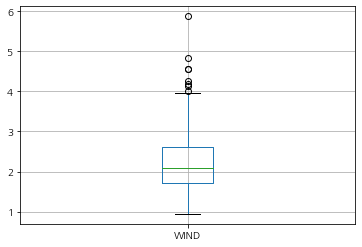

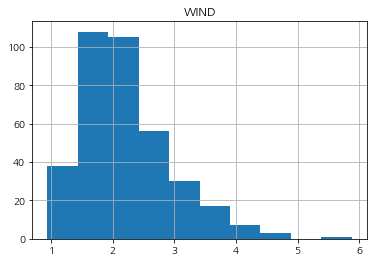

In [32]:
outlier(df, 'WIND')

**WIND**역시 그래프 상에서는 일부 이상치로 보일 수 있는 데이터가 있으나 풍속이 기상정보임을 고려하여 발생할 수 있는 데이터로 판단. 제거하지 않고 진행하였다.

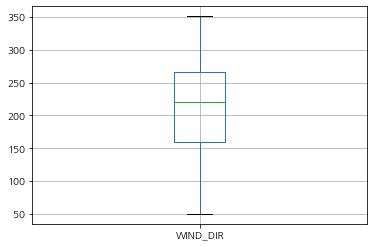

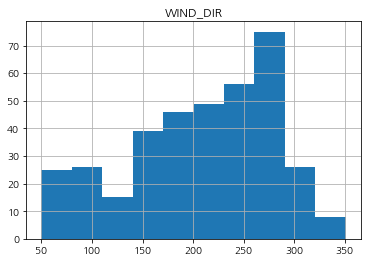

In [33]:
outlier(df, 'WIND_DIR')

**WIND_DIR**은 풍향(16방위)를 나타내는 데이터로 0~360º를 의미한다. 가장 많이 분포하고 있는 250º에서 300º 사이의 구간으로, 서풍이 가장 많이 불고 있음을 의미한다. 우리나라는 편서풍 지대에 위치하고 있기 때문에 위의 분포와 같이 나타남을 확인하였다. 별도의 이상치는 확인할 수 없었다.

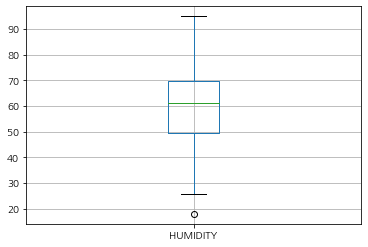

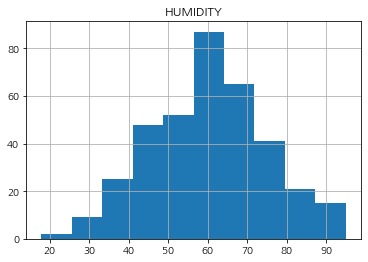

In [34]:
outlier(df, 'HUMIDITY')

**HUMIDITY**에서는 boxplot과 histogram에서 모두 큰 이상치를 발견할 수 없었으며 대략 50~70 부근을 중심적으로 분포되어 있는 양상을 보인다.

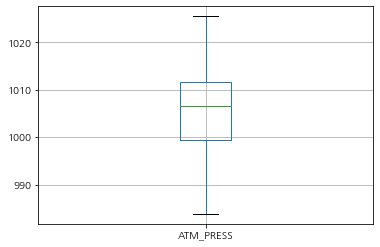

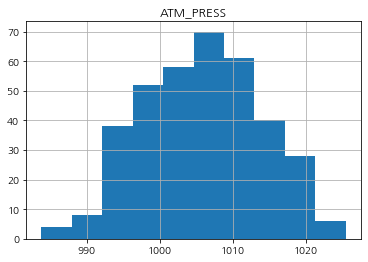

In [35]:
outlier(df, 'ATM_PRESS')

**ATM_PRESS** 역시 boxplot과 histogram에서 모두 이상치를 발견할 수 없으며 대략 1000hPa ~ 1010hPa을 중심으로 분포되고 있는 양상을 보인다.

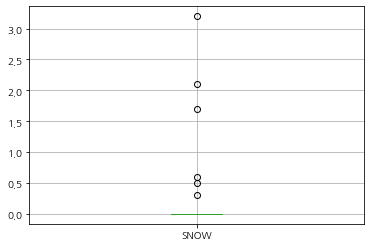

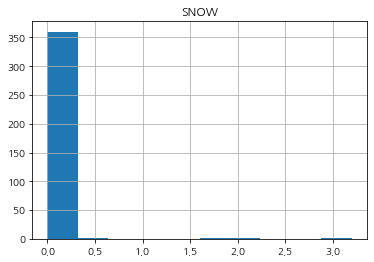

In [36]:
outlier(df, 'SNOW')

In [37]:
df[df['SNOW']>0.5]

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,Month
218,2020-02-04,23.0,0.019,0.024,0.5,0.003,-1.42,0.57,2.86,226,52.3,1015.8,0.6,4.08,2
230,2020-02-16,25.0,0.025,0.012,0.5,0.002,-0.57,1.89,3.94,270,82.7,1002.4,2.1,9.21,2
231,2020-02-17,38.0,0.027,0.011,0.4,0.002,-5.64,0.17,3.43,303,66.5,1006.7,3.2,7.58,2
232,2020-02-18,22.0,0.021,0.020,0.4,0.003,-4.28,0.00,2.33,284,44.3,1016.0,1.7,0.00,2


**SNOW**는 대부분 0에 가까우나 max값과의 차이가 많이 나 기술통계량 확인 당시 이상치가 있을 것이라 판단한 데이터였다. 그러나 값이 큰 데이터가 2월에 위치하고 있음을 고려하면 겨울철에 눈이 많이 내린 날 측정된 데이터라고 판단될 수 있다. 따라서 이상치라 판단하지 않고 진행하였다.

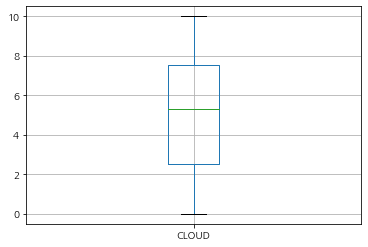

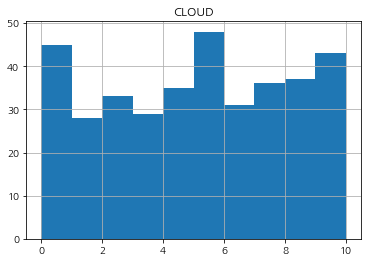

In [38]:
outlier(df, 'CLOUD')

**CLOUD**는 boxplot과 histogram 모두에서 이상치로 보이는 데이터가 존재하지 않으며 0분위부터 10분위까지 골고루 분포하고 있음을 확인하였다. 

## 데이터 구성

'MeasDate'과 'Month' 데이터는 참고자료로 사용할 수는 있으나 여름에는 기온이 올라가는 등 다른 데이터를 통해서도 충분히 유추할 수 있기 때문에 모델을 구성하는데 핵심인자로 적절치 않아 제거한다.

In [39]:
df.drop(['MeasDate'], axis=1, inplace=True)

In [40]:
df.drop(['Month'], axis=1, inplace=True)

In [41]:
df.head()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70
1,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83
2,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29
3,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54
4,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92


## 변수 간 상관관계 파악

### 대기오염 물질과 PM10 간의 산점도 그래프

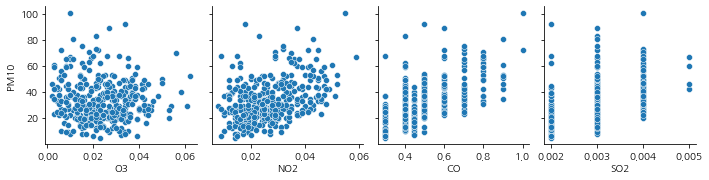

In [42]:
sns.pairplot(df, y_vars='PM10', x_vars=['O3', 'NO2', 'CO', 'SO2'])

In [47]:
df1=df[['PM10', 'O3', 'NO2', 'CO', 'SO2']]
df1.corr().round(3)

,PM10,O3,NO2,CO,SO2
PM10,1.000,-0.052,0.396,0.593,0.429
O3,-0.052,1.000,-0.592,-0.520,-0.234
NO2,0.396,-0.592,1.000,0.797,0.563
CO,0.593,-0.520,0.797,1.000,0.586
SO2,0.429,-0.234,0.563,0.586,1.000


### 기상 데이터와 PM10 간의 산점도 그래프

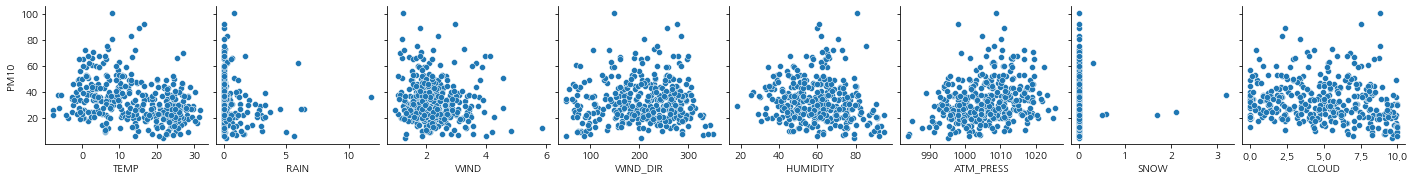

In [115]:
sns.pairplot(df, y_vars='PM10', x_vars=['TEMP', 'RAIN', 'WIND', 'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'SNOW', 'CLOUD'])

### 전체 변수 간 상관계수 확인

In [116]:
df.corr().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
PM10,1.000,-0.052,0.396,0.593,0.429,-0.310,-0.121,-0.100,0.020,-0.150,0.253,-0.020,-0.172
O3,-0.052,1.000,-0.592,-0.520,-0.234,0.516,-0.104,0.165,0.269,-0.038,-0.534,0.004,-0.119
NO2,0.396,-0.592,1.000,0.797,0.563,-0.237,0.029,-0.537,-0.408,-0.066,0.420,-0.121,0.017
CO,0.593,-0.520,0.797,1.000,0.586,-0.425,0.007,-0.372,-0.312,0.002,0.444,-0.048,-0.006
SO2,0.429,-0.234,0.563,0.586,1.000,-0.274,-0.129,-0.253,-0.093,-0.302,0.334,-0.103,-0.191
TEMP,-0.310,0.516,-0.237,-0.425,-0.274,1.000,0.077,-0.216,-0.050,0.404,-0.792,-0.185,0.342
RAIN,-0.121,-0.104,0.029,0.007,-0.129,0.077,1.000,0.126,-0.183,0.397,-0.236,0.019,0.358
WIND,-0.100,0.165,-0.537,-0.372,-0.253,-0.216,0.126,1.000,0.235,-0.084,-0.054,0.146,0.017
WIND_DIR,0.020,0.269,-0.408,-0.312,-0.093,-0.050,-0.183,0.235,1.000,-0.099,0.068,0.108,-0.297
HUMIDITY,-0.150,-0.038,-0.066,0.002,-0.302,0.404,0.397,-0.084,-0.099,1.000,-0.510,0.022,0.628


In [48]:
df1=df[['O3', 'TEMP']]

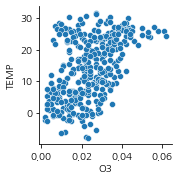

In [51]:
sns.pairplot(df1, y_vars='TEMP', x_vars='O3')

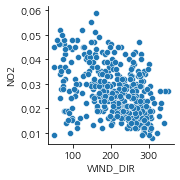

In [52]:
df1=df[['WIND_DIR', 'NO2']]
sns.pairplot(df1, y_vars='NO2', x_vars='WIND_DIR')

목표변수 **PM10**과 가장 높은 상관관계를 보이고 있는 것은 CO, NO2, SO2로 주로 대기오염 물질에 해당한다. 따라서 미세먼지와 대기오염이 선형적인 관계성이 있다고 파악된다. 그러나 대기오염물질 CO, NO2, SO2와 O3 간의 상관관계까지 높게 나타남으로 네 물질 간의 연관성이 있는지 파악할 필요성이 있다. 또한 O3는 TEMP(기온)과 높은 상관관계를 보이며 대체로 여름철에 오존 농도가 증가한다는 사실과 연관이 있어 보인다. 

기온과 기압은 큰 음의 상관관계를 가지고 있으나 이는 기상현상 상 자연스러운 것으로 보인다. 또한 풍속, 풍향과 NO2사이에 상관관계가 있다고 판단되어 바람의 영향으로 NO2와 미세먼지의 농도까지 어떤 변화가 있는지 알아볼 필요성이 있다. 습도와 전운량 사이에도 상관관계가 있는 것으로 보이나 이는 기상현상 상 자연스러운 것으로 파악된다. 

## 핵심인자 도출

### 다중선형회귀분석

표준화 회귀계수를 이용하여 변수 간 중요도를 파악한다.

In [119]:
# 데이터 스케일링
scaler=StandardScaler()
numeric_scaled = scaler.fit_transform(df)
df_scaled=pd.DataFrame(numeric_scaled, columns=df.columns)
df_scaled.head()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,-0.277826,2.558984,-0.566824,-0.047093,-0.052053,1.035373,-0.337916,0.105769,0.561308,0.204900,-1.325967,-0.103499,0.216196
1,-0.466314,2.474806,-0.664322,-0.047093,-0.052053,1.061826,-0.337916,0.050401,0.787644,0.204900,-0.894922,-0.103499,-0.410992
2,-0.214997,1.548858,-0.371828,-0.746434,-0.052053,1.050634,-0.337916,-0.600182,0.999835,0.349878,-0.931868,-0.103499,0.414079
3,-0.340655,0.875442,-0.079334,-0.746434,-0.052053,1.169676,-0.337916,-0.254127,0.759352,-0.112673,-1.141233,-0.103499,-0.843651
4,-0.277826,1.801390,0.798148,-0.047093,-0.052053,1.368080,-0.337916,-1.070816,-0.485500,-1.017064,-1.523017,-0.103499,-0.380806


train data (0.7) : test data (0.3)으로 회귀모델 생성

In [123]:
# train/test data 분리
df_train, df_test = train_test_split(df_scaled, test_size=0.3)
# 회귀모델 생성
reg_model = smf.ols(
    formula=
    'PM10 ~ O3+NO2+CO+SO2+TEMP+RAIN+WIND+WIND_DIR+HUMIDITY+ATM_PRESS+SNOW+CLOUD',
    data=df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     24.51
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           1.97e-35
Time:                        20:51:40   Log-Likelihood:                -249.08
No. Observations:                 255   AIC:                             524.2
Df Residuals:                     242   BIC:                             570.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0180      0.042     -0.430      0.6

<AxesSubplot:>

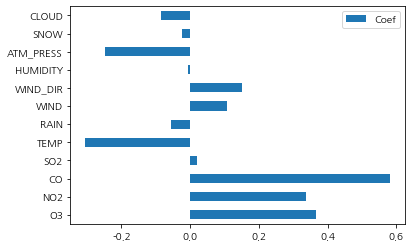

In [124]:
# 설명변수 중요도 그래프
df_coef=pd.DataFrame({"Coef" : reg_result.params.values[1:]},
                    index=['O3', 'NO2', 'CO', 'SO2', 'TEMP', 'RAIN', 'WIND', 'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'SNOW', 'CLOUD'])
df_coef.plot.barh(y='Coef')

따라서, 다중선형회귀분석에서 표준화 상관계수 분석 결과 CO, NO2, O3가 가장 중요한 인자로 도출되었으며 그 외에도 TEMP, WIND, WIND_DIR, ATM_PRESS, CLOUD가 영향인자로 도출되었다. 

### 의사결정나무

In [125]:
# 데이터 분할
df_y=df['PM10']
df_x=df.drop('PM10', axis=1, inplace=False)

train data (0.7) : test data (0.3)으로 의사결정나무 모델 생성

In [126]:
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_x, df_y, test_size=0.3)
print(df_train_x.shape)
print(df_test_x.shape)

(255, 12)
(110, 12)


In [127]:
tree=DecisionTreeRegressor()
tree.fit(df_train_x, df_train_y)

DecisionTreeRegressor()

변수 중요도 출력

In [130]:
v_feature_name=df_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,CO,0.413
7,WIND_DIR,0.119
0,O3,0.113
4,TEMP,0.093
6,WIND,0.070
9,ATM_PRESS,0.055
1,NO2,0.053
8,HUMIDITY,0.034
3,SO2,0.024
11,CLOUD,0.020


Text(0, 0.5, '변수')

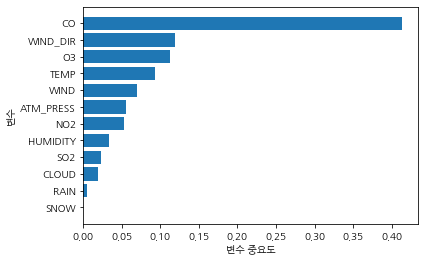

In [131]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

의사결정나무 분석 결과, 'CO'가 가장 중요하며, WIND_DIR, 'O3', 'TEMP', 'WIND', 'ATM_PRESS', 'NO2' 등 순으로 중요하다.
일산화탄소량이 미세먼지에 가장 많은 영향을 미치나 풍향, 풍속, 기온 기압 등 대기오염 물질을 운반하는 기상 관련 정보 역시 미세먼지 영향인자로 도출되었음을 확인할 수 있다. 

### 랜덤포레스트

In [133]:
rf=RandomForestRegressor()
rf.fit(df_train_x, df_train_y)

RandomForestRegressor()

In [134]:
v_feature_name=df_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,CO,0.375
0,O3,0.110
6,WIND,0.100
7,WIND_DIR,0.085
4,TEMP,0.084
1,NO2,0.059
8,HUMIDITY,0.052
11,CLOUD,0.050
9,ATM_PRESS,0.043
5,RAIN,0.026


Text(0, 0.5, '변수')

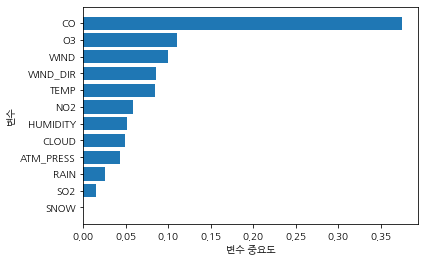

In [135]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

랜덤포레스트 분석 결과 의사결정나무 모델과 유사하게 'CO'와 'O3'인 대기오염물질이 미세먼지 농도에 가장 많은 영향을 미치는 것으로 확인되었다. 그러나 'WIND', 'WIND_DIR', 'TEMP' 등 대기오염물질을 운반하는 기상 관련 데이터 역시 미세먼지 발생에 주요한 영향인자로 작용한다는 것을 확인하였다.

### 그래디언트 부스팅

In [136]:
gb=GradientBoostingRegressor()
gb.fit(df_train_x, df_train_y)

GradientBoostingRegressor()

In [137]:
v_feature_name=df_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=gb.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,CO,0.395
0,O3,0.131
4,TEMP,0.119
7,WIND_DIR,0.083
6,WIND,0.082
8,HUMIDITY,0.056
11,CLOUD,0.046
9,ATM_PRESS,0.034
1,NO2,0.031
5,RAIN,0.021


Text(0, 0.5, '변수')

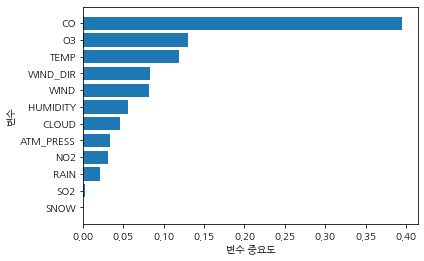

In [138]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

의사결정나무, 랜덤포레스트와 유사하게 'CO'와 'O3'의 대기오염물질이 미세먼지 농도에 큰 영향을 미치는 것으로 확인되었다. 그러나 그 외에도 'TEMP', 'WIND_DIR', 'WIND', 'HUMIDITY' 등 대기오염물질을 운반하는 기상관련 데이터가 미세먼지 농도에 주요 인자로 도출되었음을 알 수 있다.

## 잠재 영향인자 선정

다중선형회귀분석, 의사결정나무, 랜덤포레스트, 그래디언트 부스팅 모델 분석 결과를 참조하여 아래와 같은 총 7개의 미세먼지 잠재 영향인자를 선정하였다.

* 대기오염물질 : **오존**(O3), **이산화질소**(NO2), **일산화탄소**(CO)
* 기상정보 : **기온**(TEMP), **풍속**(WIND), **풍향**(WIND_DIR), **기압**(ATM_PRESS)

In [141]:
df_model=df[['PM10', 'O3', 'NO2', 'CO', 'TEMP', 'WIND', 'WIND_DIR', 'ATM_PRESS']]

In [142]:
df_model.head()

,PM10,O3,NO2,CO,TEMP,WIND,WIND_DIR,ATM_PRESS
0,29.0,0.054,0.021,0.5,24.03,2.30,249,995.1
1,26.0,0.053,0.020,0.5,24.29,2.26,265,998.6
2,30.0,0.042,0.023,0.4,24.18,1.79,280,998.3
3,28.0,0.034,0.026,0.4,25.35,2.04,263,996.6
4,29.0,0.045,0.035,0.5,27.30,1.45,175,993.5


# 모델링

## 다중선형회귀분석

### 데이터 분할

train data(0,7) : test data(0.3)으로 다중선형회귀분석 진행

In [143]:
df_train, df_test=train_test_split(df_model, test_size=0.3)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (255, 8)
test data size : (110, 8)


전체 데이터 중 train data 255개, test data 110개.

### 회귀분석 모델 생성

In [144]:
reg_model=smf.ols(formula='PM10 ~ O3 + NO2 + CO + TEMP + WIND + WIND_DIR + ATM_PRESS', data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     52.22
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           2.87e-45
Time:                        22:08:22   Log-Likelihood:                -946.16
No. Observations:                 255   AIC:                             1908.
Df Residuals:                     247   BIC:                             1937.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    159.8397    158.500      1.008      0.3

1차적으로 선형회귀분석 모델 결과, 
* **회귀계수의 유의성(t검정)** : 'WIND'와 'ATM_PRESS'의 p-value 값이 0.05보다 커서 검정 결과 유의하지 않으나, 잠재인자를 도출하는 과정에서 대기오염물질을 운반하는 요소로 바람이 필수적이라 판단하였기 때문에 'WIND'와 'ATM_PRESS' 변수가 필수적이라 판단하였다. 

* **회귀모델의 유의성(F검정)** : 2.87e-45로 p-value가 0.05보다 작기 때문에 회귀모델로써 적합하다.

* **결정계수(R-squared)** : 모델을 통하여 59.7%를 설명할 수 있다. 

### 변수 간 다중공선성 확인

In [153]:
df_train_x=df_model.drop('PM10', axis=1)
df_train_x_const=add_constant(df_train_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_train_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]
df_vif.sort_values('VIF', inplace=True)
df_vif.round(3)

,variable,VIF
6,WIND_DIR,1.352
5,WIND,1.788
1,O3,2.071
3,CO,3.494
7,ATM_PRESS,3.689
4,TEMP,4.341
2,NO2,4.741
0,const,57586.506


모든 변수들의 VIF가 10미만이므로 다중공선성 문제 해결. 모든 변수들이 유의미함.

### 잔차의 가정 확인 - 정규성, 독립성, 등분산성

#### 등분산성 확인

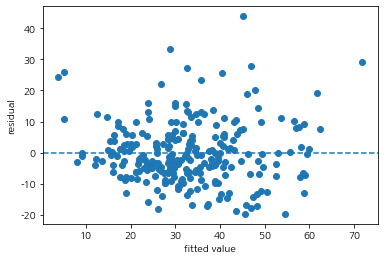

In [154]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y=0, linestyle='--')

#### 정규성 확인

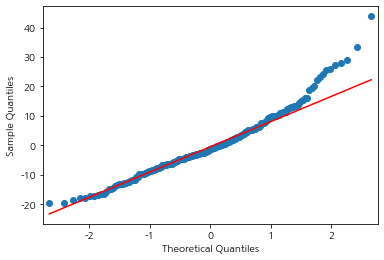

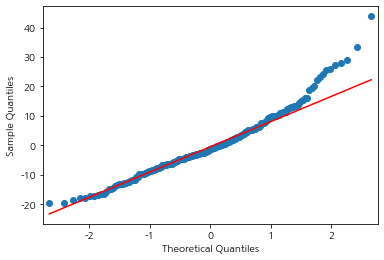

In [155]:
qqplot(reg_result.resid, line='q')

#### 독립성 확인

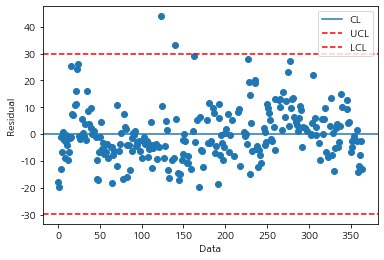

In [156]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel('Data'); plt.ylabel('Residual')
plt.axhline(y=0, linestyle='-', label='CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle='--', color='red', label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle='dashed', color='red', label='LCL')
plt.legend()

잔차의 기본 가정을 완벽하게 맞추지는 못하는 것으로 보이나, 최소한 어느정도는 만족한다고 판단하였다.

### 성능 평가

In [159]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print('train data 결정계수 : ', r2_score(df_train['PM10'],train_pred))
print('test data 결정계수 : ', r2_score(df_test['PM10'], test_pred))

train data 결정계수 :  0.5967395628655334
test data 결정계수 :  0.31723109297718943


train data의 결정계수는 59.6%로 모델 전체를 60% 가량 설명하는 것으로 확인되었으나, test data의 결정계수가 31.7%로 과대적합 되었다.

과대적합 문제를 해결하기 위해 다중선형 회귀분석을 규제화하여 Ridge 모델, Lasso 모델, ElasticNet 모델을 생성하였다.

## 다중선형회귀분석 - 규제화

### 데이터 분할

In [164]:
df_model_y=df_model['PM10']
df_model_x=df_model.drop('PM10', axis=1, inplace=False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_model_x, df_model_y, test_size=0.3)

print("train data size : {}".format(df_train_x.shape))
print("test data size : {}".format(df_test_x.shape))

train data size : (255, 7)
test data size : (110, 7)


### Ridge 모델

In [165]:
ridge=Ridge(alpha=1)
ridge.fit(df_train_x, df_train_y)

Ridge(alpha=1)

In [166]:
train_pred=ridge.predict(df_train_x)
test_pred=ridge.predict(df_test_x)
print("train data 결정계수 : ", r2_score(df_train_y, train_pred))
print("test data 결정계수 : ", r2_score(df_test_y, test_pred))

train data 결정계수 :  0.4270597433108141
test data 결정계수 :  0.310602651379722


Ridge 모델 회귀분석 결과, train data의 결정계수는 42.7%, test data의 결정계수는 31%로 train data의 성능이 하락되어 과적합 문제를 해결하려 했으나 해결하지 못한 것으로 판단된다.

### LASSO 모델

In [171]:
lasso=Lasso(alpha=1)
lasso.fit(df_train_x, df_train_y)

Lasso(alpha=1)

In [172]:
train_pred=lasso.predict(df_train_x)
test_pred=lasso.predict(df_test_x)
print("train data 결정계수 : ", r2_score(df_train_y, train_pred))
print("test data 결정계수 : ", r2_score(df_test_y, test_pred))

train data 결정계수 :  0.1252785571126006
test data 결정계수 :  -0.0015506740431465715


LASSO 모델 회귀분석 결과, train data의 결정계수는 12.5%, test data의 결정계수는 0%로 완전히 잘못된 모델로 판단된다.

### ElasticNet 모델

In [173]:
elastic=ElasticNet(alpha=1, l1_ratio=0.5)
elastic.fit(df_train_x, df_train_y)

ElasticNet(alpha=1)

In [174]:
train_pred=elastic.predict(df_train_x)
test_pred=elastic.predict(df_test_x)
print("train data 결정계수 : ", r2_score(df_train_y, train_pred))
print("test data 결정계수 : ", r2_score(df_test_y, test_pred))

train data 결정계수 :  0.1353815042331733
test data 결정계수 :  0.01665215403039111


ElasticNet 모델 회귀분석 결과, train data의 결정계수는 13.5%, test data의 결정계수는 1%로 완전히 잘못된 모델로 판단된다.

다중선형회귀분석 모델, Ridge 모델, LASSO 모델, ElasticNet 모델 분석 결과 처음 다중선형회귀분석 모델이 과대적합 경향을 보이나 가장 적합하다고 판단된다. 

## 의사결정나무

위의 분할된 train data와 test data를 그대로 사용한다.

In [175]:
print("train data size : {}".format(df_train_x.shape))
print("test data size : {}".format(df_test_x.shape))

train data size : (255, 7)
test data size : (110, 7)


### 기본 옵션으로 모델 생성

hyper parameter 설정 전, 기본 옵션으로 모델 생성 결과

In [176]:
tree_uncustomized=DecisionTreeRegressor()
tree_uncustomized.fit(df_train_x, df_train_y)

DecisionTreeRegressor()

In [177]:
print("train data : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("test data : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

train data : 1.000
test data : 0.059


기본옵션으로 의사결정나무 모델 생성 결과, train data 성능은 100%, test data 성능은 5.9%로 과대적합 되었다.

### 모델 parameter 조정

#### min_samples_leaf

In [178]:
train_score=[]; test_score=[]
para_leaf=[n_leaf for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf :
    tree=DecisionTreeRegressor(min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf=pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

In [179]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.065
1,2,0.936,0.124
2,3,0.856,-0.008
3,4,0.808,-0.048
4,5,0.757,0.109
5,6,0.672,0.290
6,7,0.657,0.252
7,8,0.635,0.254
8,9,0.626,0.263
9,10,0.620,0.273


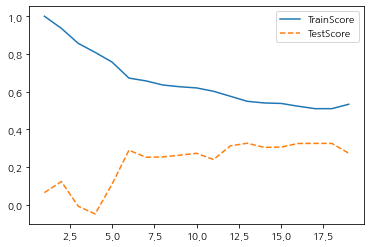

In [181]:
plt.plot(para_leaf, train_score, linestyle='-', label='TrainScore')
plt.plot(para_leaf, test_score, linestyle='--', label='TestScore')
plt.legend()

잎사귀 노드의 최소 자료수가 증가함에 따라 train data의 성능은 감소되지만 test data의 성능은 증가하다가 30% 선에서 안정된다. 따라서 과대적합 문제를 해결하기 위해 min_samples_leaf는 16으로 선정하였다.

#### min_samples_split

In [185]:
train_score = []
test_score = []
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(min_samples_leaf=16,
                                 min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [186]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.523,0.325
1,6,0.523,0.325
2,8,0.523,0.325
3,10,0.523,0.325
4,12,0.523,0.325
5,14,0.523,0.325
6,16,0.523,0.325
7,18,0.523,0.325
8,20,0.523,0.325
9,22,0.523,0.325


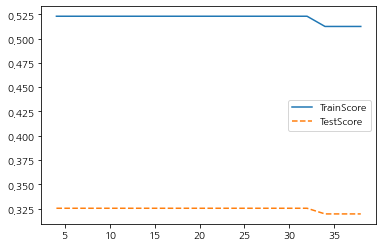

In [187]:
plt.plot(para_split, train_score, linestyle='-', label='TrainScore')
plt.plot(para_split, test_score, linestyle='--', label='TestScore')
plt.legend()

분리 노드의 최소 자료수를 지정함에 따라 train data와 test data 모두 성능면에서 큰 차이는 발생하지 않았다.
따라서 min_samples_split hyper parameter는 지정하지 않았다.

#### max_depth

In [192]:
train_score = []
test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(min_samples_leaf=16, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [193]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.270,0.238
1,2,0.370,0.311
2,3,0.476,0.291
3,4,0.514,0.303
4,5,0.523,0.325
5,6,0.523,0.325
6,7,0.523,0.325
7,8,0.523,0.325
8,9,0.523,0.325
9,10,0.523,0.325


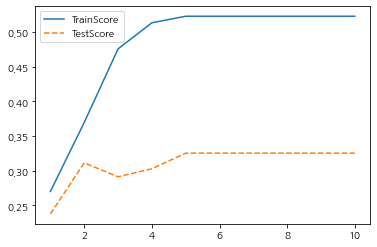

In [194]:
plt.plot(para_depth, train_score, linestyle='-', label='TrainScore')
plt.plot(para_depth, test_score, linestyle='--', label='TestScore')
plt.legend()

최대 깊이가 증가함에 따라 train data는 과적합 되었으며 test data는 성능면에서 증가하다가 5 이후로 안정되었다. 따라서 과대적합 문제를 최대한 해결하기 위하여 max_depth로 5를 선정하였다. 

### 최종 모델

In [196]:
tree=DecisionTreeRegressor(min_samples_leaf=16, max_depth=5)
tree.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=16)

### 성능 평가

In [197]:
print("train data : {:.3f}".format(tree.score(df_train_x, df_train_y)))
print("test data : {:.3f}".format(tree.score(df_test_x, df_test_y)))

train data : 0.523
test data : 0.325


따라서 의사결정나무 모델 최종 분석 결과 train data의 성능은 52.3%, test data의 성능은 32.5%로 여전히 과대적합의 문제는 남아 있으나 처음보다 많이 해결된 것으로 판단된다.

## 랜덤포레스트

위의 분할된 train data와 test data를 그대로 사용한다.

In [198]:
print("train data size : {}".format(df_train_x.shape))
print("test data size : {}".format(df_test_x.shape))

train data size : (255, 7)
test data size : (110, 7)


### 기본 옵션으로 모델 생성

In [199]:
rf_uncustomized=RandomForestRegressor()
rf_uncustomized.fit(df_train_x, df_train_y)

RandomForestRegressor()

In [200]:
print("train data : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("test data : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

train data : 0.927
test data : 0.381


기본옵션으로 의사결정나무 모델 생성 결과, train data 성능은 92.7%, test data 성능은 38.1%로 과대적합 되었다.

### 모델 parameter 조정

#### n_estimators 

In [201]:
train_score = []
test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [202]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.913,0.279
1,20,0.912,0.298
2,30,0.925,0.363
3,40,0.924,0.349
4,50,0.929,0.357
5,60,0.925,0.383
6,70,0.927,0.330
7,80,0.912,0.376
8,90,0.926,0.354
9,100,0.927,0.358


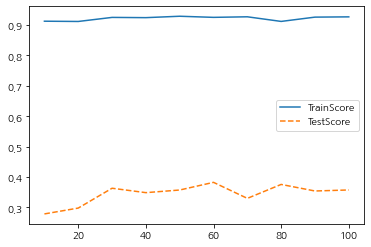

In [203]:
plt.plot(para_n_tree, train_score, linestyle='-', label='TrainScore')
plt.plot(para_n_tree, test_score, linestyle='--', label='TestScore')
plt.legend()

트리 수를 증가시켜도 과대적합 문제를 크게 해결하지 못한 것으로 보인다. 그러나 test data의 성능을 최대한 고려하여 n_estimators로 60을 선정하여다. 

#### min_samples_leaf

In [204]:
train_score = []
test_score = []
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators=60, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [205]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.922,0.372
1,2,0.868,0.388
2,3,0.817,0.395
3,4,0.770,0.420
4,5,0.737,0.421
5,6,0.704,0.396
6,7,0.680,0.419
7,8,0.644,0.398
8,9,0.625,0.377
9,10,0.607,0.390


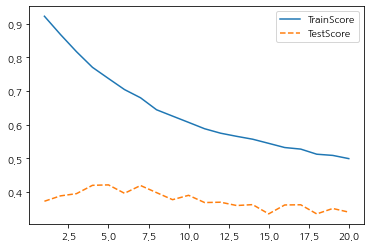

In [206]:
plt.plot(para_leaf, train_score, linestyle='-', label='TrainScore')
plt.plot(para_leaf, test_score, linestyle='--', label='TestScore')
plt.legend()

잎사귀 노드의 최소 자료수가 증가함에 따라 train data의 과대적합 문제는 해결되는 것으로 보이나 test data의 성능에는 큰 차이가 없다. 따라서 최대한 정확도 변화를 고려하여 min_samples_leaf로 5를 선정하였다. 

#### min_samples_split

In [208]:
train_score = []
test_score = []
para_split = [n_split for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators=60, min_samples_leaf=5,
                              min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [209]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.729,0.413
1,3,0.722,0.424
2,4,0.720,0.414
3,5,0.734,0.410
4,6,0.729,0.402
5,7,0.738,0.403
6,8,0.728,0.432
7,9,0.731,0.424
8,10,0.733,0.422
9,11,0.731,0.422


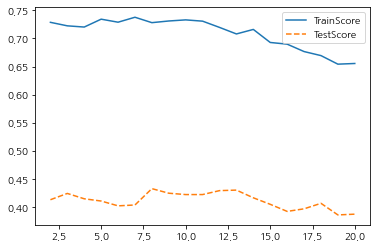

In [211]:
plt.plot(para_split, train_score, linestyle='-', label='TrainScore')
plt.plot(para_split, test_score, linestyle='--', label='TestScore')
plt.legend()

분리 노드의 최소 자료수가 증가함에 따라 train data의 성능은 감소하나 test data의 정확도에는 큰 변화를 보이지 않는다. 최대한 성능을 고려하여 min_samples_split으로 8을 선정하였다. 

#### max_depth

In [213]:
train_score = []
test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators=60, min_samples_leaf=5,
                              min_samples_split=8,
                              max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [214]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.324,0.284
1,2,0.457,0.353
2,3,0.591,0.395
3,4,0.651,0.415
4,5,0.696,0.399
5,6,0.718,0.393
6,7,0.725,0.404
7,8,0.732,0.398
8,9,0.732,0.426
9,10,0.735,0.415


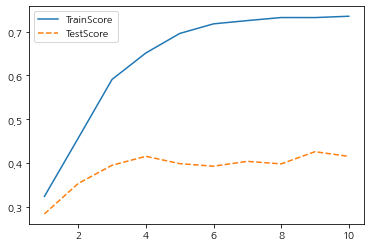

In [215]:
plt.plot(para_depth, train_score, linestyle='-', label='TrainScore')
plt.plot(para_depth, test_score, linestyle='--', label='TestScore')
plt.legend()

최대 깊이가 증가함에 따라 train data는 과적합 되는 경향성을 보이나, test data는 성능이 증가하다가 0.4 부근에서 정체되는 것을 확인하였다. 따라서 max_depth로 9를 선정하였다. 

### 최종 모델

In [218]:
rf = RandomForestRegressor(n_estimators=60,
                           min_samples_leaf=5,
                           min_samples_split=8,
                           max_depth=9)
rf.fit(df_train_x, df_train_y)

RandomForestRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=8,
                      n_estimators=60)

### 성능 평가

In [219]:
print("train data : {:.3f}".format(rf.score(df_train_x, df_train_y)))
print("test data : {:.3f}".format(rf.score(df_test_x, df_test_y)))

train data : 0.737
test data : 0.424


따라서 랜덤포레스트로 최종모델 생성 결과 train data의 성능은 73.7%, test data의 성능은 42.4%로 과대적합 문제를 완벽하게 해결하지는 못했으나 test datad의 성능을 대폭 향상시켰다. 

## 그래디언트 부스팅

위의 분할된 train data와 test data를 그대로 사용한다.

In [221]:
print("train data size : {}".format(df_train_x.shape))
print("test data size : {}".format(df_test_x.shape))

train data size : (255, 7)
test data size : (110, 7)


### 기본 옵션으로 모델 생성

In [223]:
gb_uncustomized=GradientBoostingRegressor()
gb_uncustomized.fit(df_train_x, df_train_y)

GradientBoostingRegressor()

In [224]:
print("train data : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("test data : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

train data : 0.915
test data : 0.418


기본 옵션으로 그래디언트 부스팅 모델 생성 결과, train data의 성능은 91.5%, test data의 성은 41.8%로 과대적합 되었다.

### 모델 parameter 조정

#### n_estimators

In [226]:
train_score = []
test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [227]:
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.546,0.303
1,20,0.700,0.371
2,30,0.769,0.389
3,40,0.810,0.413
4,50,0.837,0.410
5,60,0.859,0.421
6,70,0.875,0.420
7,80,0.889,0.413
8,90,0.904,0.431
9,100,0.915,0.412


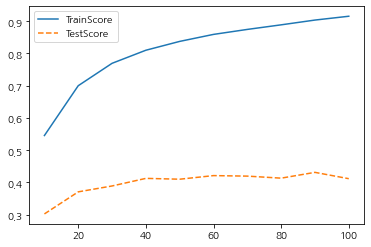

In [228]:
plt.plot(para_n_tree, train_score, linestyle='-', label='TrainScore')
plt.plot(para_n_tree, test_score, linestyle='--', label='TestScore')
plt.legend()

트리수가 증가함에 따라 train data에 과대적합되는 경향성을 보이며, test data는 성능이 향상되다가 0.42에서 정체되는 것으로 확인된다. 따라서 과대적합 문제를 최대한 해결하고 test data의 성능을 향상시키기 위해서 n_estimators로 60을 선정하였다.

#### min_samples_leaf

In [229]:
train_score = []
test_score = []
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators=60, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [230]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.859,0.413
1,2,0.847,0.428
2,3,0.834,0.445
3,4,0.845,0.431
4,5,0.824,0.448
5,6,0.819,0.443
6,7,0.810,0.434
7,8,0.801,0.448
8,9,0.802,0.436
9,10,0.801,0.448


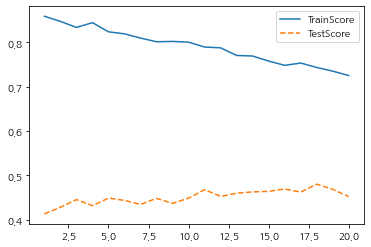

In [232]:
plt.plot(para_leaf, train_score, linestyle='-', label='TrainScore')
plt.plot(para_leaf, test_score, linestyle='--', label='TestScore')
plt.legend()

잎사귀 노드의 최소 자료수가 증가함에 따라 train data의 성능은 하락하고 test data의 성능은 조금씩 상승하는 경향을 보인다. 따라서 min_samples_leaf로 18을 선정하였다.

#### min_samples_split

In [233]:
train_score = []
test_score = []
para_split = [n_split for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(n_estimators=60, min_samples_leaf=18,
                              min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [234]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.743,0.48
1,3,0.743,0.48
2,4,0.743,0.48
3,5,0.743,0.48
4,6,0.743,0.48
5,7,0.743,0.48
6,8,0.743,0.48
7,9,0.743,0.48
8,10,0.743,0.48
9,11,0.743,0.48


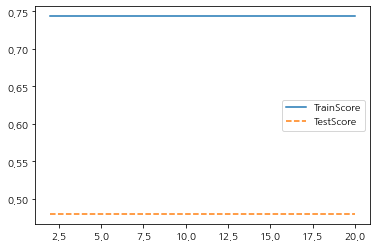

In [235]:
plt.plot(para_split, train_score, linestyle='-', label='TrainScore')
plt.plot(para_split, test_score, linestyle='--', label='TestScore')
plt.legend()

min_samples_split 값을 변경해도 train data와 test data 모두 성능면에서 큰 변화가 나타나지 않으므로 설정하지 않는다.

#### max_depth

In [236]:
train_score = []
test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(n_estimators=60,
                                   min_samples_leaf=18,
                                   max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [237]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.496,0.395
1,2,0.661,0.478
2,3,0.743,0.480
3,4,0.785,0.454
4,5,0.817,0.437
5,6,0.825,0.438
6,7,0.841,0.426
7,8,0.840,0.435
8,9,0.841,0.427
9,10,0.843,0.428


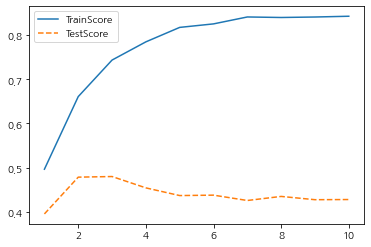

In [239]:
plt.plot(para_depth, train_score, linestyle='-', label='TrainScore')
plt.plot(para_depth, test_score, linestyle='--', label='TestScore')
plt.legend()

최대 깊이가 증가할수록 train data는 과대적합 되는 경향을 보이며, test data는 성능이 잠시 상승했다가 다시 하락 후 안정세를 보이는 경향이 있다. 따라서 test data의 성능을 고려하고 과대적합을 해결하기 위하여 max_depth는 4로 설정하였다.

#### learning rate

In [241]:
train_score = []
test_score = []
para_lr = [lr*0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(n_estimators=60,
                                   min_samples_leaf=18,
                                   max_depth=4,
                                  learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

df_score_lr = pd.DataFrame()
df_score_lr['LearningRage'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

In [242]:
df_score_lr.round(3)

,LearningRage,TrainScore,TestScore
0,0.1,0.785,0.454
1,0.2,0.858,0.398
2,0.3,0.905,0.361
3,0.4,0.935,0.309
4,0.5,0.957,0.337
5,0.6,0.972,0.325
6,0.7,0.982,0.196
7,0.8,0.982,0.191
8,0.9,0.985,0.238


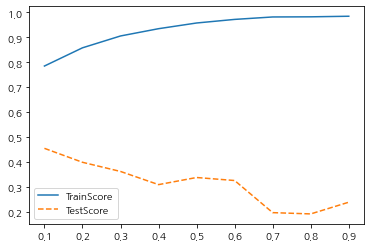

In [243]:
plt.plot(para_lr, train_score, linestyle='-', label='TrainScore')
plt.plot(para_lr, test_score, linestyle='--', label='TestScore')
plt.legend()

학습률이 증가함에 따라 train data는 과대적합되는 경향을 보이고, test data의 성능은 하락한다. 따라서 test data의 성능을 고려하여 learing rate으로 0.1을 선정하였다.

### 최종 모델

In [248]:
gb = GradientBoostingRegressor(n_estimators=60,
                               min_samples_leaf=18,
                               max_depth=4,
                               learning_rate=0.1)
gb.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=18, n_estimators=60)

### 성능 평가

In [249]:
print("train data : {:.3f}".format(gb.score(df_train_x, df_train_y)))
print("test data : {:.3f}".format(gb.score(df_test_x, df_test_y)))

train data : 0.785
test data : 0.454


그래디언트 부스팅 모델 생성 결과, train data의 성능은 78.5%, test data의 성능은 45.4%로, 과대적합 문제를 완벽히는 해결하지 못했으나 성능면에서는 이전 모델 대비 가장 우수한 성능을 보이는 것으로 판단된다. 

# 모델 최종 평가

지금까지 생성한 회귀분석모델, 의사결정나무, 랜덤포레스트, 그래디언트 부스팅 모델로 최종 성능 평가를 진행한다. 

In [262]:
models=['회귀분석' ,'의사결정나무', '랜덤포레스트', '그래디언트 부스팅']
mse, rmse, mae, mape=[], [], [], []

## 회귀분석모델 최종 평가

In [263]:
lr_pred=reg_result.predict(df_test)

mse.append(mean_squared_error(df_test['PM10'], lr_pred))
rmse.append(root_mean_squared_error(df_test['PM10'], lr_pred))
mae.append(mean_absolute_error(df_test['PM10'], lr_pred))
mape.append(mean_absolute_percentage_error(df_test['PM10'], lr_pred))

## 의사결정나무 모델 최종 평가

In [264]:
tree_pred=tree.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, tree_pred))
rmse.append(root_mean_squared_error(df_test_y, tree_pred))
mae.append(mean_absolute_error(df_test_y, tree_pred))
mape.append(mean_absolute_percentage_error(df_test_y, tree_pred))

## 랜덤포레스트 모델 최종 평가

In [265]:
rf_pred=rf.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_pred))
mae.append(mean_absolute_error(df_test_y, rf_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_pred))

## 그래디언트 부스팅 모델 최종 평가

In [266]:
gb_pred=gb.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_pred))
mae.append(mean_absolute_error(df_test_y, gb_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_pred))

## 모델 간 최종 평가점수 비교

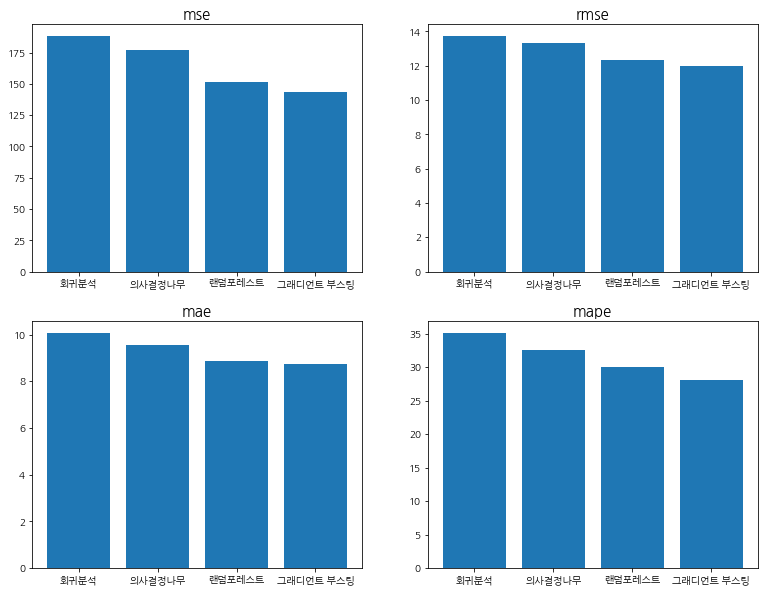

In [267]:
fig, ax=plt.subplots(2,2, figsize=(13,10))

ax[0,0].bar(models, mse)
ax[0,0].set_title('MSE').set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title('RMSE').set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title('MAE').set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title('MAPE').set_fontsize(15)

평가지표 별 모델의 추세는 매우 유사하게 나타난다. 따라서 그래디언트 부스팅 모델의 정확도가 가장 높고 회귀분석 모델의 정확도가 가장 낮은 것을 확인하였다. 결과적으로 성능이 가장 우수하게 나타나는 그래디언트 부스팅 모델을 최종 미세먼지 발생량 예측 모델로 채택하였다. 

# 결론

그래디언트 부스팅 모델이 최종 모델로 채택되었다.
hyper parameter로 트리 수 60개, 잎사귀 노드 최소 자료수 18개, 최대 깊이 4, 학습률 0.1로 선정되었다.

In [268]:
gb = GradientBoostingRegressor(n_estimators=60,
                               min_samples_leaf=18,
                               max_depth=4,
                               learning_rate=0.1)
gb.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=18, n_estimators=60)

In [269]:
print("train data : {:.3f}".format(gb.score(df_train_x, df_train_y)))
print("test data : {:.3f}".format(gb.score(df_test_x, df_test_y)))

train data : 0.785
test data : 0.454


최종 성능은 255개의 train data에서 78.5%, 110개의 test data에서 45.4%의 정확도를 보였다.

위의 모델로 설명변수의 중요도를 파악한 결과는 아래와 같다.

In [270]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=gb.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,CO,0.488
0,O3,0.187
3,TEMP,0.111
5,WIND_DIR,0.072
4,WIND,0.052
1,NO2,0.050
6,ATM_PRESS,0.039


Text(0, 0.5, '변수')

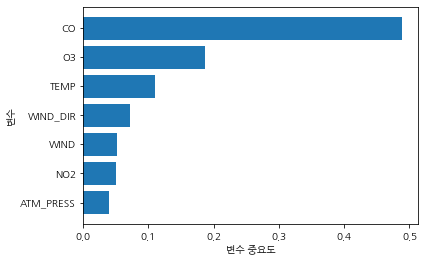

In [271]:
# 설명변수 중요도 그래프
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

따라서 최종적으로 미세먼지 발생량에 가장 중요한 영향인자로는 대기오염물질인 일산화탄소와 오존이 있으며, 그 외 기온과 풍속, 풍향이 주요 영향인자로써 대기오염물질을 운반하여 미세먼지 발생에 영향을 미친다는 것을 확인하였다.